# Question 1

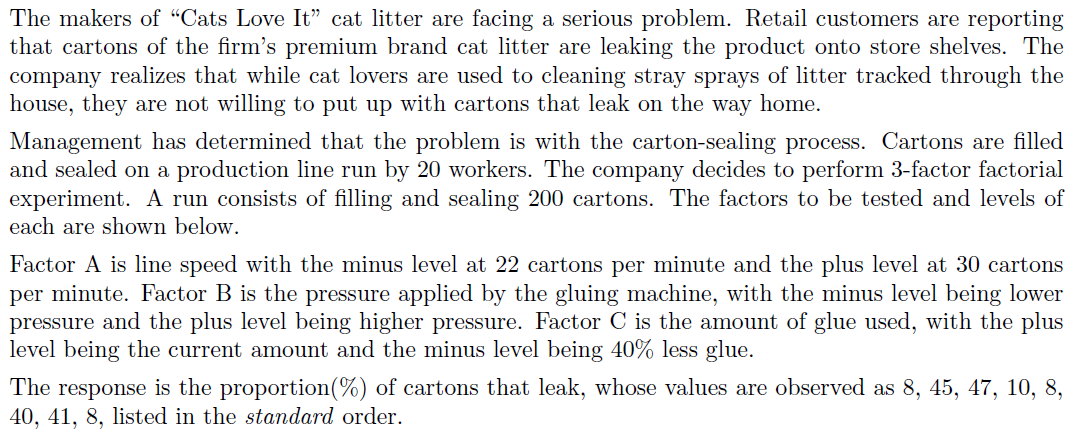

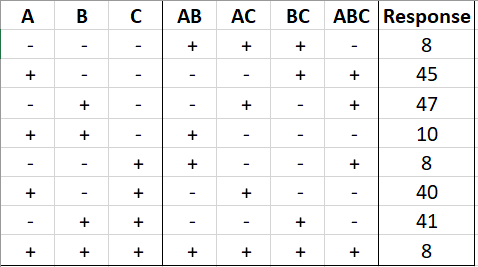

### Hypotheses

$$ H_{o}: E_{A} = 0$$
$$ H_{a}: E_{A} \neq 0$$
<br>
$$ H_{o}: E_{B} = 0$$
$$ H_{a}: E_{B} \neq 0$$
<br>
$$ H_{o}: E_{C} = 0$$
$$ H_{a}: E_{C} \neq 0$$
<br>
$$ H_{o}: E_{AB} = 0$$
$$ H_{a}: E_{AB} \neq 0$$
<br>
$$ H_{o}: E_{AC} = 0$$
$$ H_{a}: E_{AC} \neq 0$$
<br>
$$ H_{o}: E_{BC} = 0$$
$$ H_{a}: E_{BC} \neq 0$$
<br>
$$ H_{o}: E_{ABC} = 0$$
$$ H_{a}: E_{ABC} \neq 0$$
<br>
### Point Estimates for each Effect $(\bar{y}_{+} - \bar{y}_{-})$:
$ A = -0.25, B = 1.25, C = -3.25, AB = -34.75, AC = -0.25, BC = -0.75, ABC = 2.25 $
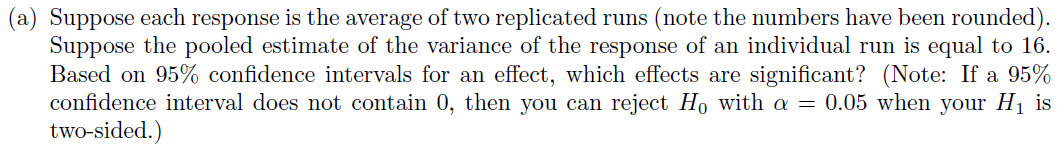

__Confidence Interval__: $$ Point Estimate of Effect \pm (t^{*}_{\alpha / 2, dof}) * (\frac{\sigma^{2}_{run}}{n_{+}} + \frac{\sigma^{2}_{run}}{n_{-}}) $$

In [1]:
from scipy.stats import t

pooled_var = 16
alpha = 0.05
dof_setting = 2 - 1
dof_total = dof_setting*8 #this is the denominator in the pooled variance calculation - use 8 because there are 8 settings
t = t.ppf(1-(alpha/2), dof_total)

experimental_error = (pooled_var/8) + (pooled_var/8)

# Confidence Interval Calculations
a_low = -0.25 - t*experimental_error
a_high = -0.25 + t*experimental_error
print('Confidence interval for effect A: [' + str(round(a_low,3)) + ', ' + str(round(a_high,3)) + ']')

b_low = 1.25 - t*experimental_error
b_high = 1.25 + t*experimental_error
print('Confidence interval for effect B: [' + str(round(b_low,3)) + ', ' + str(round(b_high,3)) + ']')

c_low = -3.25 - t*experimental_error
c_high = -3.25 + t*experimental_error
print('Confidence interval for effect C: [' + str(round(c_low,3)) + ', ' + str(round(c_high,3)) + ']')

ab_low = -34.75 - t*experimental_error
ab_high = -34.75 + t*experimental_error
print('Confidence interval for effect AB: [' + str(round(ab_low,3)) + ', ' + str(round(ab_high,3)) + ']')

ac_low = -0.25 - t*experimental_error
ac_high = -0.25 + t*experimental_error
print('Confidence interval for effect AC: [' + str(round(ac_low,3)) + ', ' + str(round(ac_high,3)) + ']')

bc_low = -0.75 - t*experimental_error
bc_high = -0.75 + t*experimental_error
print('Confidence interval for effect BC: [' + str(round(bc_low,3)) + ', ' + str(round(bc_high,3)) + ']')

abc_low = 2.25 - t*experimental_error
abc_high = 2.25 + t*experimental_error
print('Confidence interval for effect ABC: [' + str(round(abc_low,3)) + ', ' + str(round(abc_high,3)) + ']')

Confidence interval for effect A: [-9.474, 8.974]
Confidence interval for effect B: [-7.974, 10.474]
Confidence interval for effect C: [-12.474, 5.974]
Confidence interval for effect AB: [-43.974, -25.526]
Confidence interval for effect AC: [-9.474, 8.974]
Confidence interval for effect BC: [-9.974, 8.474]
Confidence interval for effect ABC: [-6.974, 11.474]


__Based on the above confidence intervals, all effects are insignificant except for the AB interaction effect. This is because the AB effect is the only effect whose confidence interval does not contain 0. This is the only effect where the null hypothesis (H0 = 0) can be rejected. All other hypotheses must fail to reject. AB is the only significant effect.__

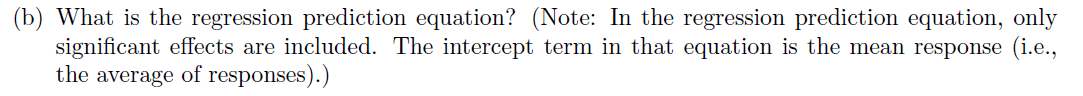

In [53]:
from statsmodels import regression
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

AB = [1, -1, -1, 1, 1, -1, -1, 1] #corresponds to + and - for AB factor in factorial chart
AB_effect = -34.75
response = [8, 45, 47, 10, 8, 40, 41, 8]

beta = AB_effect / 2

X = sm.add_constant(AB)
model = regression.linear_model.OLS(response, X).fit()
display(model.summary())
intercept = model.params[0]

y_hat = []
for level in AB:
    y_hat.append(intercept + level*model.params[1])
print('Y predictions: ', y_hat)
    
calculated_intercept = np.mean(y_hat)
print('Intercept from statsmodels package: ', intercept)
print('Intercept calculated as average y hat: ', calculated_intercept)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     405.3
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           9.75e-07
Time:                        14:44:22   Log-Likelihood:                -17.340
No. Observations:                   8   AIC:                             38.68
Df Residuals:                       6   BIC:                             38.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8750      0.863     29.982      0.000      23.763      27.987
x1           -17.3750      0.863    -20.133      0.000     -19.487     -15.263
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.275
Skew:                           0.203   Prob(JB):                        0.872
Kurtosis:                       2.188   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y predictions:  [8.499999999999996, 43.25, 43.25, 8.499999999999996, 8.499999999999996, 43.25, 43.25, 8.499999999999996]
Intercept from statsmodels package:  25.874999999999996
Intercept calculated as average y hat:  25.875


In the final regression model, the only factor included is the AB interaction - the remaining factors are accounted for among the model residuals. The model coefficient for AB is -17.375 (half of the AB interaction effect), and the model intercept is 25.875 (the average predicted y from the regression model). 
<br>
<br>
__Thus, the regression equation is proportion(%) = 25.875 -17.375*AB + error, where AB is the interaction effect between line speed (A) and pressure applied by the gluing machine (B)__ The remaining insignificant factors are part of the model error.

### Recommended Levels for Each Factor, and Predicted Response

In this problem, a lower value for the response variable (proportion of cartons that leak) is preferable. Based on the predicted response values from the regression equation, the response is minimized when the AB interaction effect is at the plus level (+).  __The optimal level for the interaction effect AB is '+', which can be achieved by setting both A and B to '+' or '-'. For Factor A, the ideal level is '+'__, which corresponds to a line speed of 30 cartons per minute. The '+' level should be used instead of the '-' level so higher production rates are achieved. __As for Factor B, the optimal level is '+' as well, since it must be set to the same as Factor A so as to achieve an interaction effect at the '+' level for AB.__ The '+' level for Factor B corresponds to higher pressure applied on the gluing machine. __The level of Factor C is insignificant in the model, but it should be set to '-' (40% less glue used) to save on production costs.__ 

In [54]:
optimal_response = 25.875 - 17.375*(1)
print('The optimal predicted response is ' + str(optimal_response) + '% of cartons leaking, if both A and B are set to the plus level')

The optimal predicted response is 8.5% of cartons leaking, if both A and B are set to the plus level
